# Ordinary Differential Equations in Practice

In this notebook, we'll explore how to solve ordinary differential equations (ODEs) in practice, 
focusing on two approaches:

1. **Matrix Diagonalization** for linear, time-independent systems.  
2. **Numerical Integration** using the forward Euler method.

We'll also connect these methods to the Schrödinger equation, showing how the same ideas appear 
in quantum mechanical problems. 

---

## 1. Solving a Linear ODE by Diagonalization

As discussed in theory, if we have a system:

$$
\frac{d\mathbf{y}(t)}{dt} = A \, \mathbf{y}(t),
\quad 
\mathbf{y}(0) = \mathbf{y}_0,
$$

and if $A$ is diagonalizable, we can obtain an analytical solution via:

$$
\mathbf{y}(t) = e^{A t}\,\mathbf{y}_0.
$$

We'll illustrate this with a simple $2 \times 2$ matrix.

In [1]:
import numpy as np

# Define a 2x2 matrix A
A = np.array([[-1.0,  2.0],
              [ 0.0, -3.0]])

# Initial condition
y0 = np.array([1.0, 0.5]) 

# Diagonalize A
eigs, V = np.linalg.eig(A)
V_inv = np.linalg.inv(V)

# Define a time array
t_points = np.linspace(0, 2, 200)

# We compute y(t) = e^(A t) * y0 by diagonalizing
Y = []
for t in t_points:
    # e^(A t) = V * diag(e^(lambda_i * t)) * V_inv
    # diag(e^(lambda_i * t))
    expD = np.diag(np.exp(eigs * t))
    # Calculate e^(A t)
    expA_t = V @ expD @ V_inv
    
    # y(t) = e^(A t) * y0
    y_t = expA_t @ y0
    Y.append(y_t)

Y = np.array(Y)

# Print out the final value at t=2
print("y(2) =", Y[-1])

y(2) = [0.20176355 0.00123938]


We have:
- `A`: the system matrix.
- `y0`: initial condition $\mathbf{y}(0)$.
- We diagonalize $A$ to find $A = V D V^{-1}$.
- Then $\exp(A t) = V \exp(D t) V^{-1}$.

If you run the code, you'll see the final value of $\mathbf{y}(2)$.  
We could also visualize the time evolution:

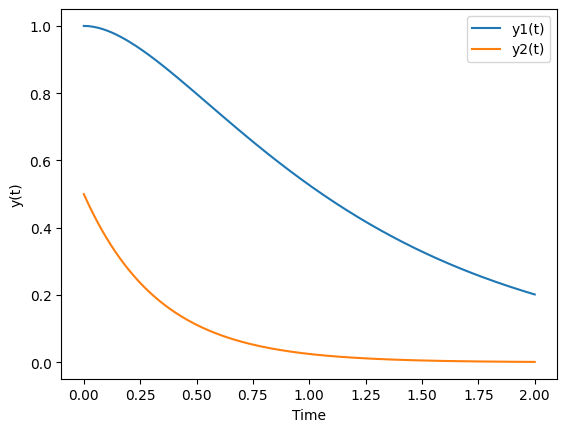

In [2]:
import matplotlib.pyplot as plt

plt.plot(t_points, Y[:, 0], label="y1(t)")
plt.plot(t_points, Y[:, 1], label="y2(t)")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.legend()
plt.show()

---

## 2. Numerical Integration via the Forward Euler Method

Next, let's illustrate the **forward Euler** method for a simpler ODE.  
Consider the scalar equation:

$$
\frac{dy}{dt} = - \lambda \, y(t),
\quad
y(0) = y_0.
$$

We know the exact solution is $y(t) = y_0 \, e^{-\lambda t}$. We'll see how 
Euler's method approximates it.

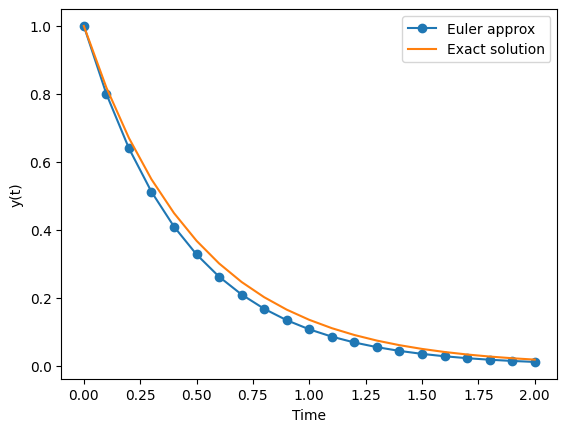

In [3]:
# Define parameters
lambda_ = 2.0
y0 = 1.0
tmax = 2.0
h = 0.1  # step size
num_steps = int(tmax / h)
t_array = np.linspace(0, tmax, num_steps + 1)

# Initialize
y_euler = np.zeros(num_steps + 1)
y_euler[0] = y0

# Forward Euler iteration
for n in range(num_steps):
    y_euler[n+1] = y_euler[n] + h * (-lambda_ * y_euler[n])

# Exact solution for comparison
y_exact = y0 * np.exp(-lambda_ * t_array)

# Plot results
plt.plot(t_array, y_euler, marker='o', label="Euler approx")
plt.plot(t_array, y_exact, label="Exact solution")
plt.xlabel("Time")
plt.ylabel("y(t)")
plt.legend()
plt.show()

Here we see how the Euler solution compares to the exact exponential decay. 
Notice that using a large time step $h$ can cause the Euler solution to deviate 
significantly from the exact decay (and may even diverge if $|1 - \lambda h| \ge 1$).

---

## 3. Connection to the Schrödinger Equation

### 3.1 A Two-Level System (Time-Independent)

Suppose we have a two-level system with Hamiltonian

$$
\hat{H} = 
\begin{pmatrix}
E_1 & 0 \\
0 & E_2
\end{pmatrix}.
$$

In matrix form (choosing $\hbar = 1$ for simplicity),

$$
\frac{d\mathbf{c}(t)}{dt} = -i \hat{H} \,\mathbf{c}(t),
$$
 
where $\mathbf{c}(t) = (c_1(t), c_2(t))^T$. 
If $H$ is diagonal, it is already in an eigenbasis. The solution is:

$$
\mathbf{c}(t) = 
\begin{pmatrix}
c_1(0) e^{-i E_1 t} \\
c_2(0) e^{-i E_2 t}
\end{pmatrix}.
$$

### 3.2 Numerical Approach for a Time-Dependent Hamiltonian

For more general cases (time-dependent $H(t)$ or non-diagonal forms), 
we can discretize time and use Euler or more advanced methods (like Runge--Kutta) 
to approximate:

$$
\mathbf{c}_{n+1} 
= \mathbf{c}_n + h \, \bigl[-\,i\,H(t_n)\,\mathbf{c}_n\bigr].
$$

We'll illustrate a short snippet (though often in practice, higher-order methods 
or libraries like QuTiP are preferred for accuracy).

In [4]:
def time_dependent_H(t):
    # Example: a Hamiltonian that slowly changes over time
    # (just a toy model: H = sigma_z + 0.1 * t * sigma_x)
    sigma_x = np.array([[0, 1],[1, 0]], dtype=complex)
    sigma_z = np.array([[1, 0],[0, -1]], dtype=complex)
    return sigma_z + 0.1 * t * sigma_x

# Euler solve of i d/dt c(t) = H(t) c(t),  c(0) = [1,0]^T
c0 = np.array([1.0, 0.0], dtype=complex)
tmax = 1.0
h = 0.01
num_steps = int(tmax / h)
c_vals = np.zeros((num_steps+1, 2), dtype=complex)
t_vals = np.linspace(0, tmax, num_steps+1)
c_vals[0] = c0

for n in range(num_steps):
    t_n = t_vals[n]
    H_n = time_dependent_H(t_n)
    c_vals[n+1] = c_vals[n] + h * (-1j) * (H_n @ c_vals[n])

# Just show the final state at t = tmax
print("Final state (approx) =", c_vals[-1])

Final state (approx) = [ 0.5420378 -0.84516162j -0.01512691-0.04184321j]


This is a very naive discretization. In practice, you would typically use more stable 
and accurate methods. Nonetheless, the procedure is exactly the same: we replace the 
time derivative by a finite difference and use the Hamiltonian to update the state.

---

# Summary

1. We reviewed how to **analytically solve** linear ODEs by **diagonalizing** the system matrix.
2. We **implemented the forward Euler** method for a simple ODE, showing how discretization 
   works in practice and discussing stability concerns.
3. We **connected these ideas to the Schrödinger equation**, illustrating how either diagonalization 
   (for a time-independent Hamiltonian) or numerical integration (for a time-dependent Hamiltonian) 
   can be used for quantum system simulations.

You can experiment with different time steps and matrices to see how the stability and accuracy 
change. For real-world simulations, higher-order solvers (e.g., Runge--Kutta methods) or 
specialized libraries (e.g., QuTiP for quantum systems) are often used to ensure both speed 
and reliability.